In [ ]:
!pip install numpy umap-learn matplotlib pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00


Load preprocessed files for all documents

In [3]:
with open('umap_result.pkl', 'rb') as f:
    umap_result = pickle.load(f)

with open('preprocessed_docs.pkl', 'rb') as f:
    preprocessed_docs = pickle.load(f)

In [8]:
# Load the preprocessed_docs.csv
file_name = 'preprocessed_docs.csv'
df = pd.read_csv(file_name, low_memory=False)
print("Length of preprocessed_docs:", len(preprocessed_docs))
print("Length of df:", len(df))

Length of preprocessed_docs: 461789
Length of df: 461789


Plot UMAP with normalized word count

In [ ]:
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
df['Word_Count'] = df['Abstract'].apply(lambda x: len(x.split()))
combined_df = pd.concat([umap_df, df[['Word_Count']]], axis=1)
scaler = MinMaxScaler()
combined_df['Normalized_Word_Count'] = scaler.fit_transform(combined_df[['Word_Count']])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    combined_df['UMAP1'],
    combined_df['UMAP2'],
    c=combined_df['Normalized_Word_Count'],
    cmap='viridis',
    s=0.05,
    alpha=0.5
)

plt.colorbar(scatter, label='Normalized Word Count')
plt.title('Normalized Word Count UMAP')
plt.xticks([])
plt.yticks([])  # Remove y-axis ticks
plt.gca().spines['top'].set_visible(False)  # Remove top spine
plt.gca().spines['right'].set_visible(False)  # Remove right spine
plt.gca().spines['left'].set_visible(False)  # Remove left spine
plt.gca().spines['bottom'].set_visible(False)
plt.savefig('UMAP word count supplementary.png', dpi=600)
plt.show()

Plot all the UMAPs highlighting the presence of top differential words for each cluster

<ipython-input-13-927b75ee8818>:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=2)


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

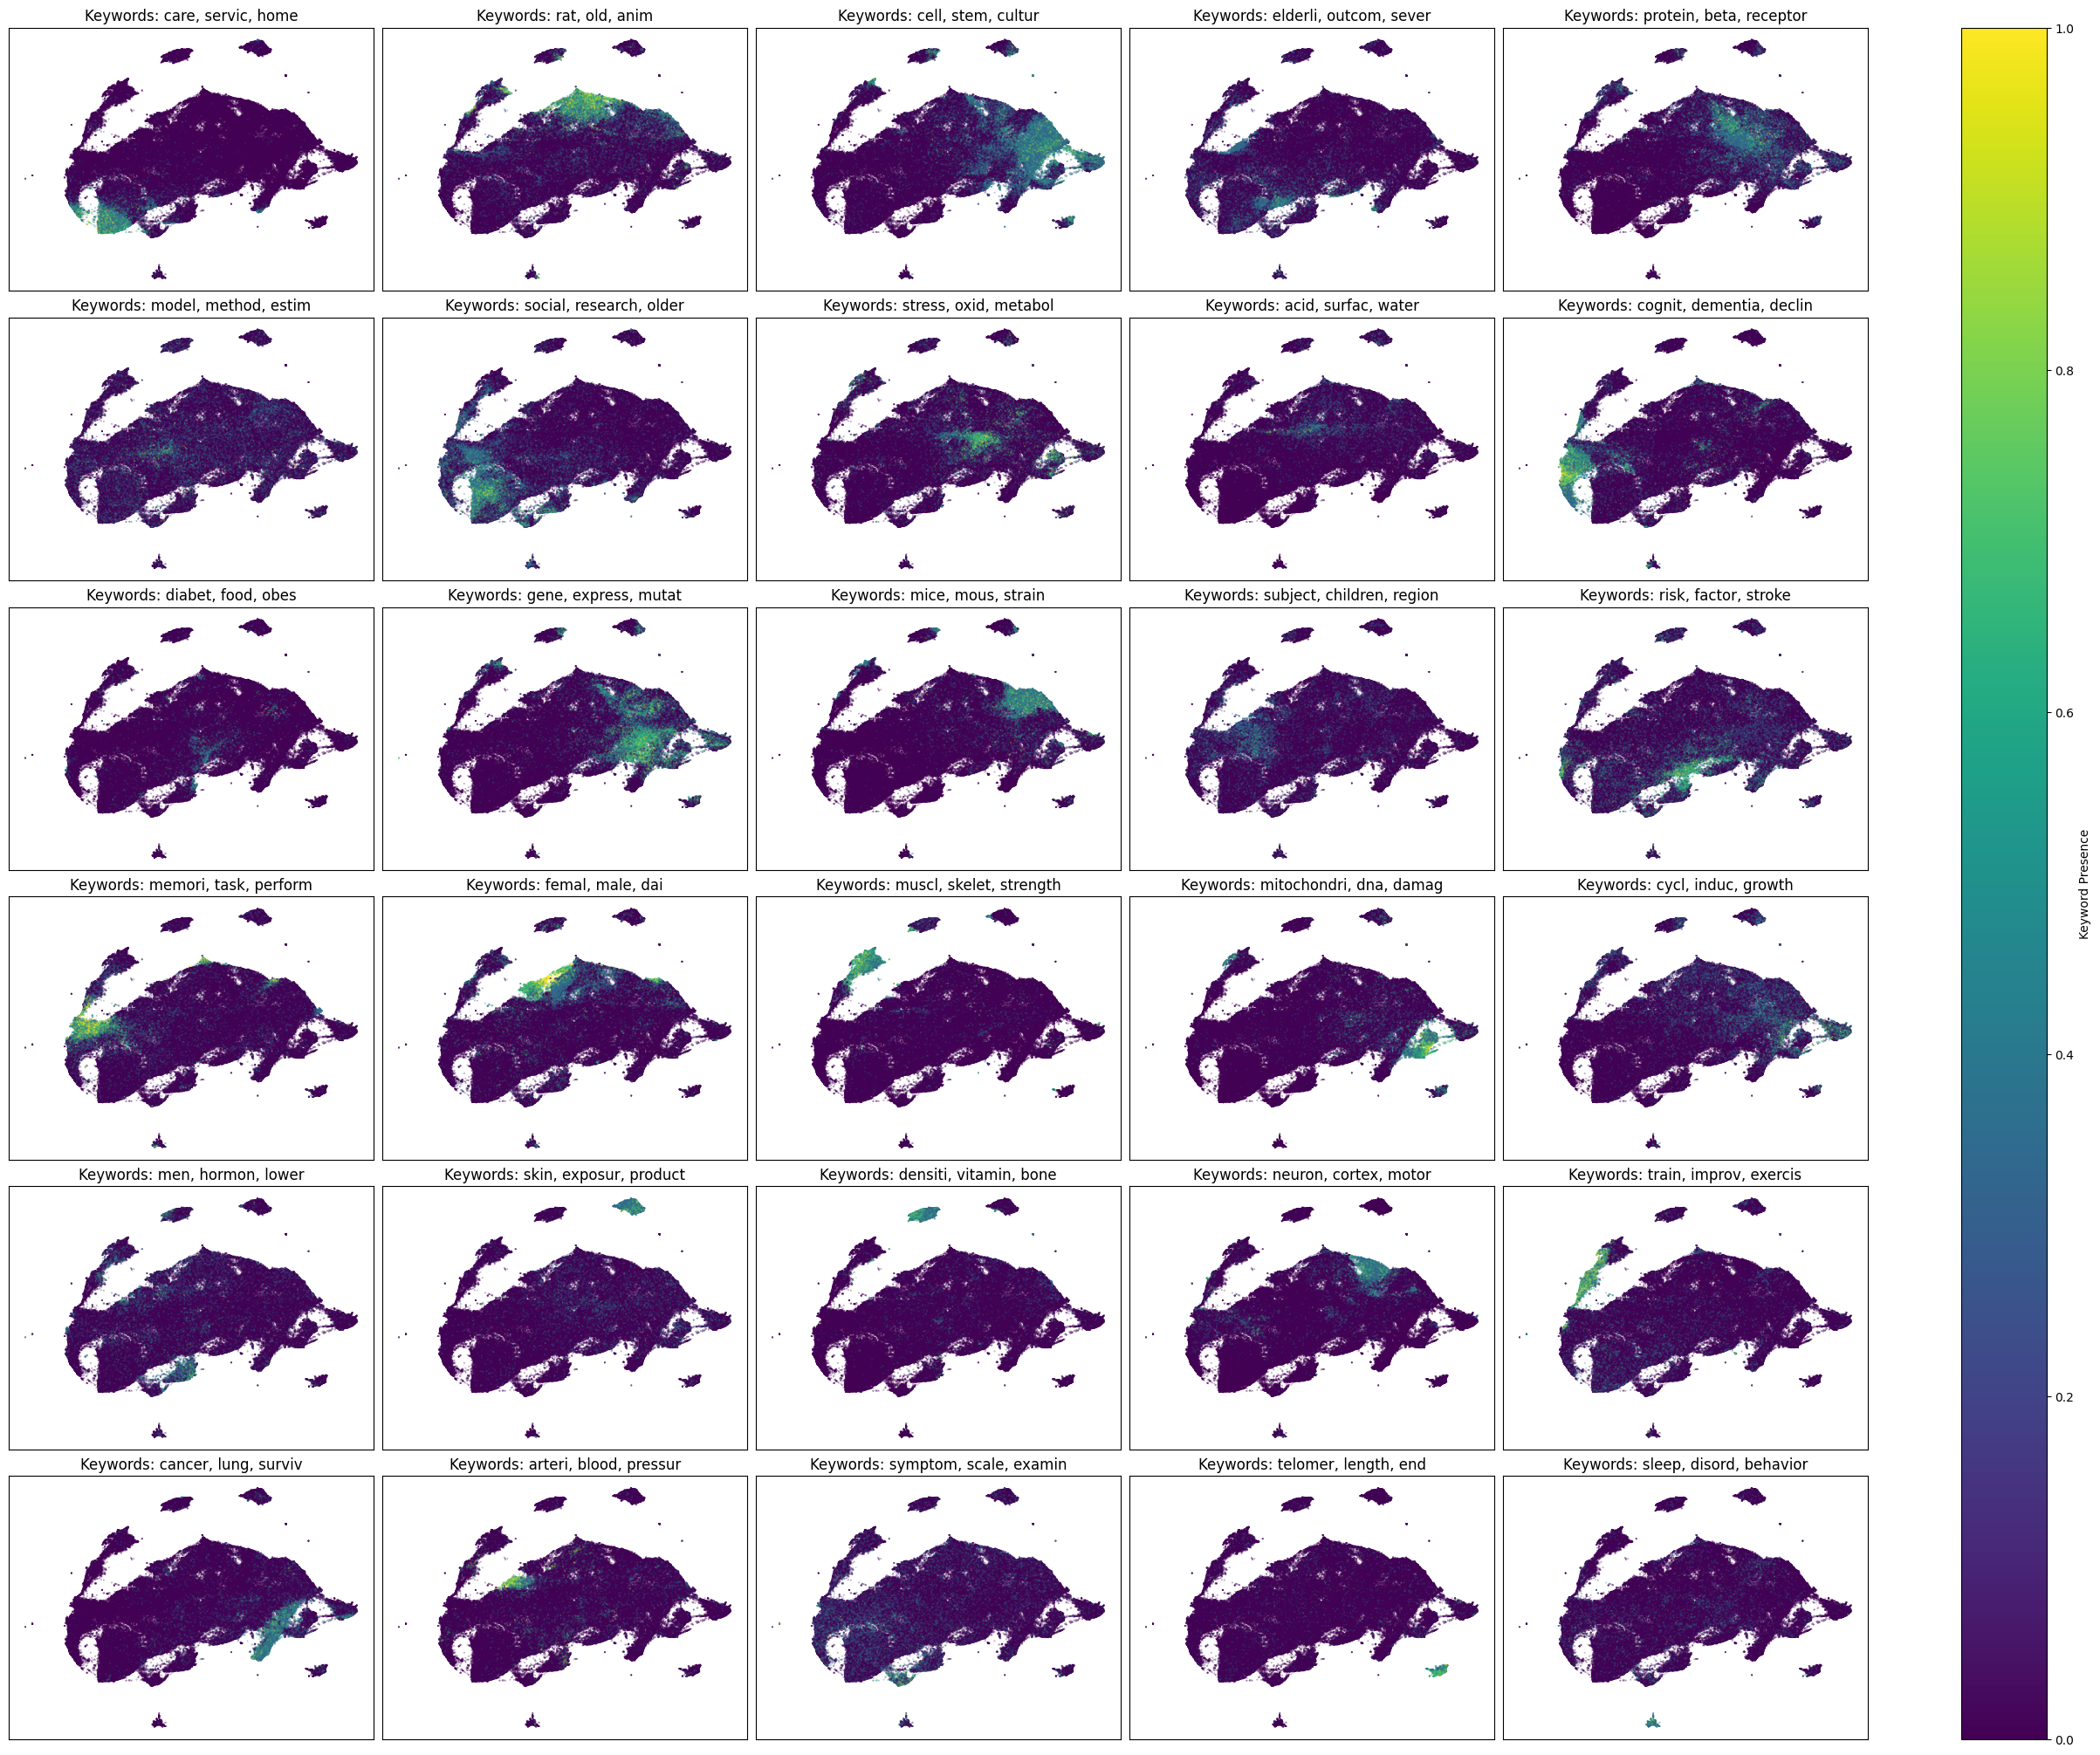

In [ ]:
keywords_columns = [
  ['cognit', 'dementia', 'impair'],
  ['mutat', 'genet', 'gene'],
  ['patient', 'drug', 'elderli'],
  ['femal', 'male', 'sex'],
  ['express', 'mrna', 'stem'],
  ['exercis', 'train', 'physic'],
  ['diabet', 'insulin', 'glucos'],
  ['women', 'men', 'serum'],
  ['diet', 'acid', 'intak'],
  ['model', 'estim', 'data'],
  ['diseas', 'review', 'relat'],
  ['depress', 'symptom', 'scale'],
  ['immun', 'infect', 'respons'],
  ['brain', 'region', 'network'],
  ['adult', 'memori', 'task'],
  ['care', 'health', 'servic'],
  ['oxid', 'stress', 'antioxid'],
  ['rat', 'dai', 'anim'],
  ['muscl', 'skelet', 'mass'],
  ['dna', 'repair', 'damag'],
  ['group', 'year', 'significantli'],
  ['neuron', 'protein', 'beta'],
  ['pressur', 'arteri', 'blood'],
  ['skin', 'exposur', 'appear'],
  ['telomer', 'length', 'end'],
  ['cancer', 'tumor', 'lung'],
  ['senesc', 'cellular', 'induc'],
  ['mitochondri', 'dysfunct', 'complex'],
  ['sleep', 'qualiti', 'behavior'],
  ['mice', 'mous', 'defici'],
  ['bone', 'densiti', 'loss'],
  ['temperatur', 'surfac', 'water']
]

# Define the function to plot UMAPs
def plot_umaps_grid(keywords_columns, umap_result3, preprocessed_docs):
    fig, axes = plt.subplots(6, 6, figsize=(24, 20), constrained_layout=True)
    axes = axes.flatten()
    for idx, keywords in enumerate(keywords_columns):
        if idx >= len(axes):
            break
        keyword_counts = np.array([sum(kw in doc for kw in keywords) for doc in preprocessed_docs])
        max_count = np.max(keyword_counts)
        normalized_counts = keyword_counts / max_count if max_count > 0 else np.zeros_like(keyword_counts)
        cmap = plt.get_cmap('viridis')
        colors = cmap(normalized_counts)
        ax = axes[idx]
        scatter = ax.scatter(umap_result3[:, 0], umap_result3[:, 1], color=colors, s=0.1, alpha=0.5)
        ax.set_title(f"Keywords: {', '.join(keywords[:3])}", fontsize=12)  # Show first 3 keywords in the title
        ax.set_xticks([])
        ax.set_yticks([])
    for ax in axes[len(keywords_columns):]:
        ax.axis('off')

    plt.subplots_adjust(hspace=2)
    fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=axes, orientation='vertical', fraction=0.05, pad=0.05, label='Keyword Presence')
    plt.savefig('UMAPs All supplementary.png', dpi=600)
    plt.tight_layout()

plot_umaps_grid(keywords_columns, umap_result, preprocessed_docs)

Load preprocessed files for BoA documents

In [14]:
with open('filtered_docs_biology.pkl', 'rb') as f:
    filtered_docs_biology = pickle.load(f)

with open('umap_result_biology.pkl', 'rb') as f:
    umap_result_biology = pickle.load(f)

# Load the dataset
file_name = 'preprocessed_docs_biology.csv'
df = pd.read_csv(file_name, low_memory=False)

# Print lengths to verify
print("Length of filtered_docs_biology:", len(filtered_docs_biology))
print("Length of df:", len(df))

Length of filtered_docs: 96696
Length of df: 96696


Plot UMAP with normalized word count (BoA)

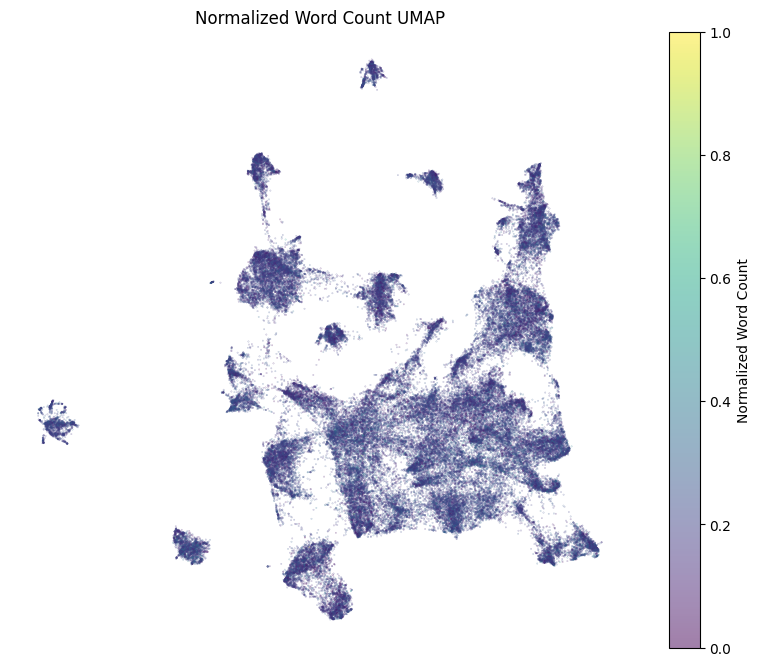

In [15]:
umap_df_biology = pd.DataFrame(umap_result_biology, columns=['UMAP1', 'UMAP2'])
df['Word_Count'] = df['Abstract'].apply(lambda x: len(str(x).split()))
combined_df = pd.concat([umap_df_biology, df[['Word_Count']]], axis=1)
scaler = MinMaxScaler()
combined_df['Normalized_Word_Count'] = scaler.fit_transform(combined_df[['Word_Count']])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    combined_df['UMAP1'],
    combined_df['UMAP2'],
    c=combined_df['Normalized_Word_Count'],
    cmap='viridis',
    s=0.05,
    alpha=0.5
)

plt.colorbar(scatter, label='Normalized Word Count')
plt.title('Normalized Word Count UMAP')
plt.xticks([])
plt.yticks([])
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)
plt.savefig('UMAP_word_count_supplementary_boa.png', dpi=600)
plt.show()

Plot all the UMAPs highlighting the presence of top differential words for each cluster

<ipython-input-20-f6f9ce53559b>:52: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=2)


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

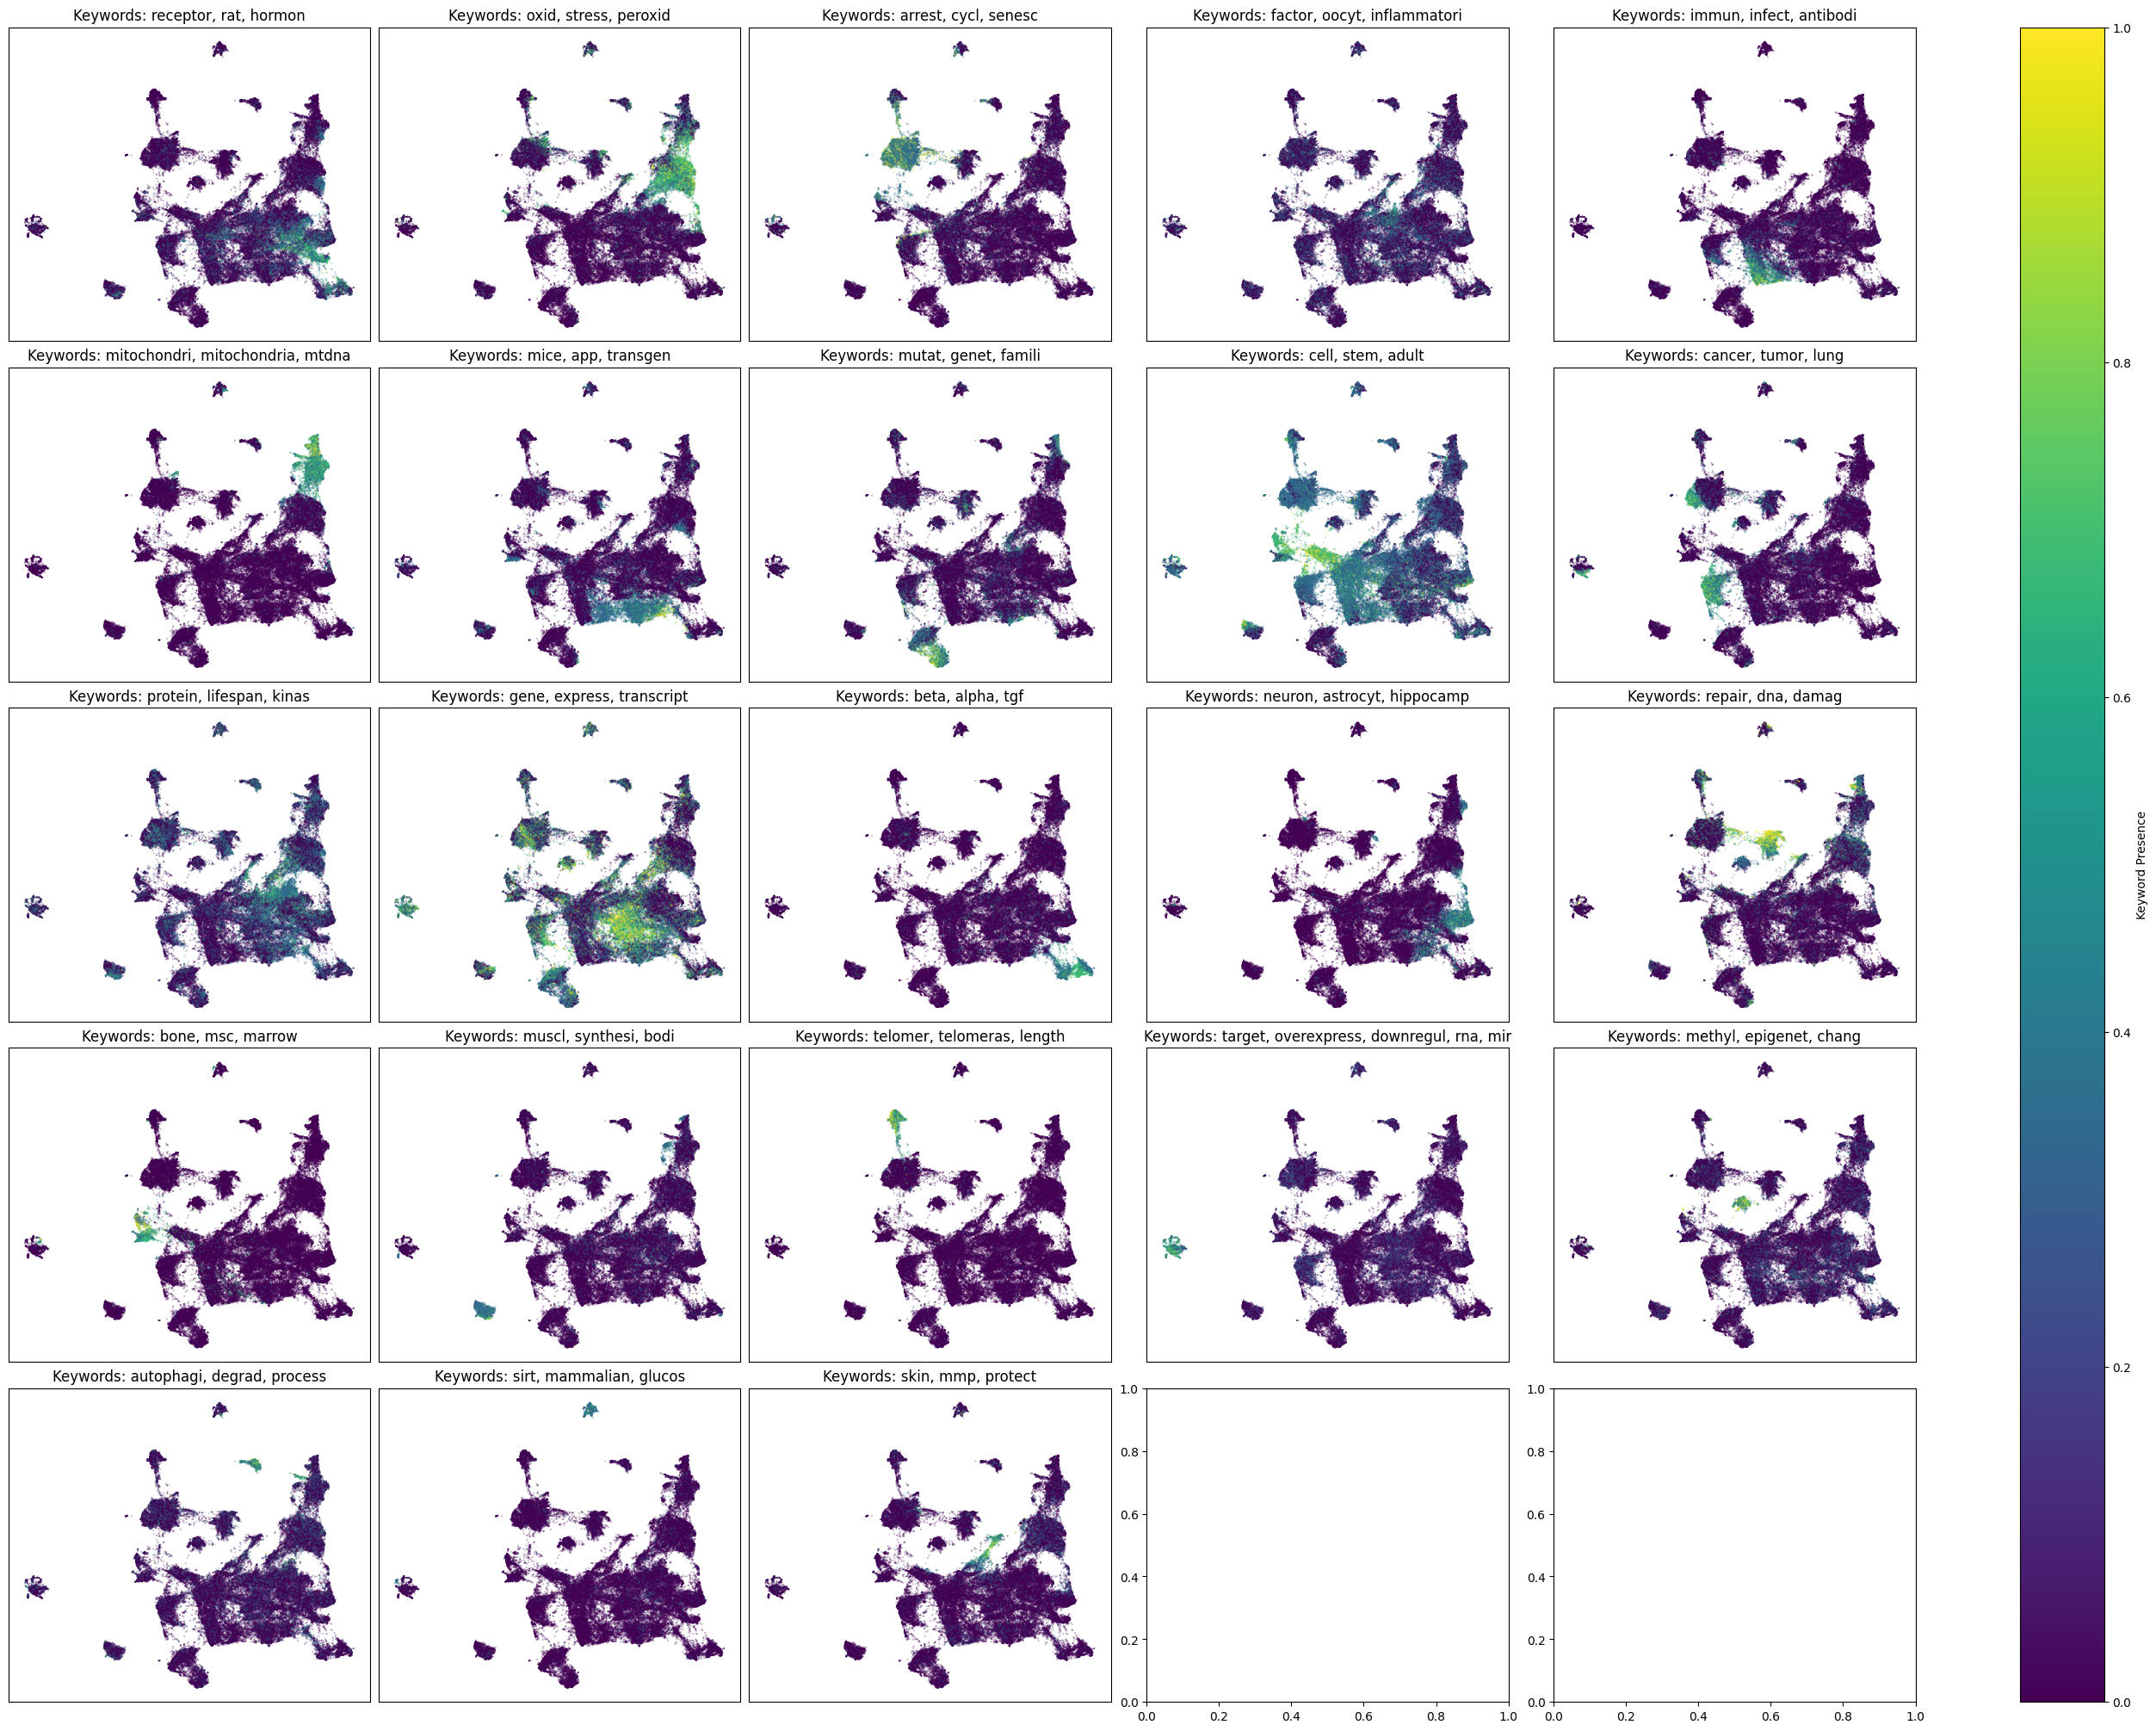

In [ ]:
keywords_columns_biology = [
  ['variant', 'genet', 'allel'],
  ['gene', 'express', 'transcript'],
  ['cancer', 'tumor', 'line'],
  ['methyl', 'epigenet', 'modif'],
  ['insulin', 'igf', 'lifespan'],
  ['oxid', 'stress', 'antioxid'],
  ['stem', 'embryon', 'progenitor'],
  ['bone', 'msc', 'marrow'],
  ['transgen', 'mous', 'model'],
  ['activ', 'enzym', 'rat'],
  ['neuron', 'astrocyt', 'brain'],
  ['young', 'old', 'mice'],
  ['skin', 'mmp', 'inflammatori'],
  ['lymphocyt', 'immun', 'infect'],
  ['mutat', 'patient', 'caus'],
  ['mitochondri', 'atp', 'mtdna'],
  ['protein', 'domain', 'interact'],
  ['senesc', 'cellular', 'arrest'],
  ['dna', 'repair', 'damag'],
  ['beta', 'app', 'amyloid'],
  ['muscl', 'skelet', 'mass'],
  ['mir', 'mirna', 'target'],
  ['receptor', 'bind', 'densiti'],
  ['alpha', 'subunit', 'tnf'],
  ['telomer', 'telomeras', 'length'],
  ['sirt', 'mammalian', 'delai'],
  ['autophagi', 'degrad', 'homeostasi']
]

# Function to plot UMAPs
def plot_umaps_grid(keywords_columns_biology, umap_result_biology, filtered_docs_biology):
    fig, axes = plt.subplots(6, 5, figsize=(25, 20), constrained_layout=True)
    axes = axes.flatten()

    for idx, keywords in enumerate(keywords_columns_biology):
        if idx >= len(axes):
            break

        keyword_counts = np.array([sum(kw in doc for kw in keywords) for doc in filtered_docs_biology])
        max_count = np.max(keyword_counts)
        normalized_counts = keyword_counts / max_count if max_count > 0 else np.zeros_like(keyword_counts)

        cmap = plt.get_cmap('viridis')
        colors = cmap(normalized_counts)

        ax = axes[idx]
        scatter = ax.scatter(umap_result_biology[:, 0], umap_result_biology[:, 1], color=colors, s=0.1, alpha=0.5)
        ax.set_title(f"Keywords: {', '.join(keywords[:5])}", fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])

    for ax in axes[len(keywords_columns):]:
        ax.axis('off')

    plt.subplots_adjust(hspace=2)
    fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=axes, orientation='vertical', fraction=0.05, pad=0.05, label='Keyword Presence')
    plt.savefig('UMAPs_supplementary_boa.png', dpi=600)
    plt.tight_layout()

# Call function with BoA files and keywords
plot_umaps_grid(keywords_columns_biology, umap_result_biology, filtered_docs_biology)